In [ ]:
+from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
from sklearn.decomposition import FastICA
#set path, a=patient, b=training/testing, c=csv file, d=training/testing
a=1
b='E'
c=1
d="Testing"
#set observation range
x=6000
y=10000
z=22 #components

eeg = pd.read_csv("/content/drive/MyDrive/BTP_AMRITAMAM/Filters/Butterworth/A0%d/%s/butterA0%d%c_%d.csv"%(a,d,a,b,c))
li=[]
for i in range(1,23):
    li.append(str(i))
eeg.columns=li


eeg.iloc[x:y].plot(figsize=(15,5), legend=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=10)
plt.ylabel('Voltage [\u03BCV]', fontsize=14)
plt.title('Resting state EEG (22 channels)', fontsize=14)
#plt.savefig('eeg_all.png')
plt.show()

FileNotFoundError: ignored

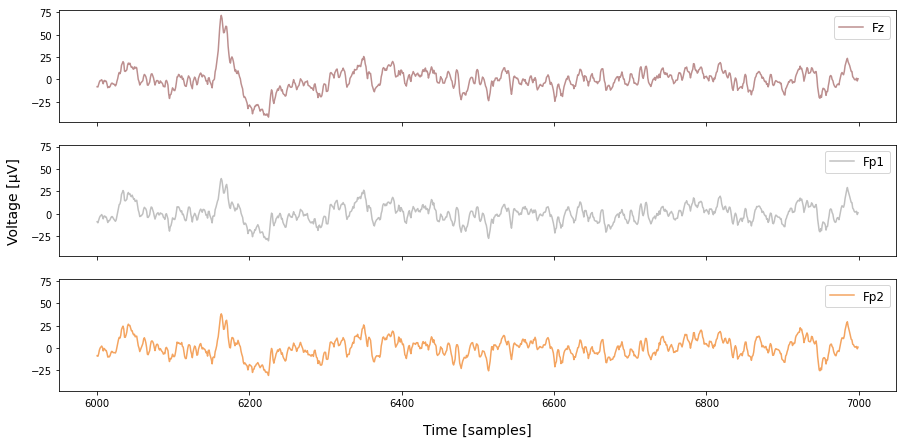

In [ ]:

fig, axs = plt.subplots(3,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['1'].iloc[x:y], label='Fz', color='rosybrown')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['3'].iloc[x:y], label='Fp1', color='silver')
axs[1].legend(loc="upper right", fontsize=12)
axs[2].plot(eeg['5'].iloc[x:y], label='Fp2', color='sandybrown')
axs[2].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15)
#plt.savefig('fp1_fp2.png')
plt.show()

In [ ]:
ica = FastICA(n_components=z, random_state=0, tol=0.05)
comps = ica.fit_transform(eeg)

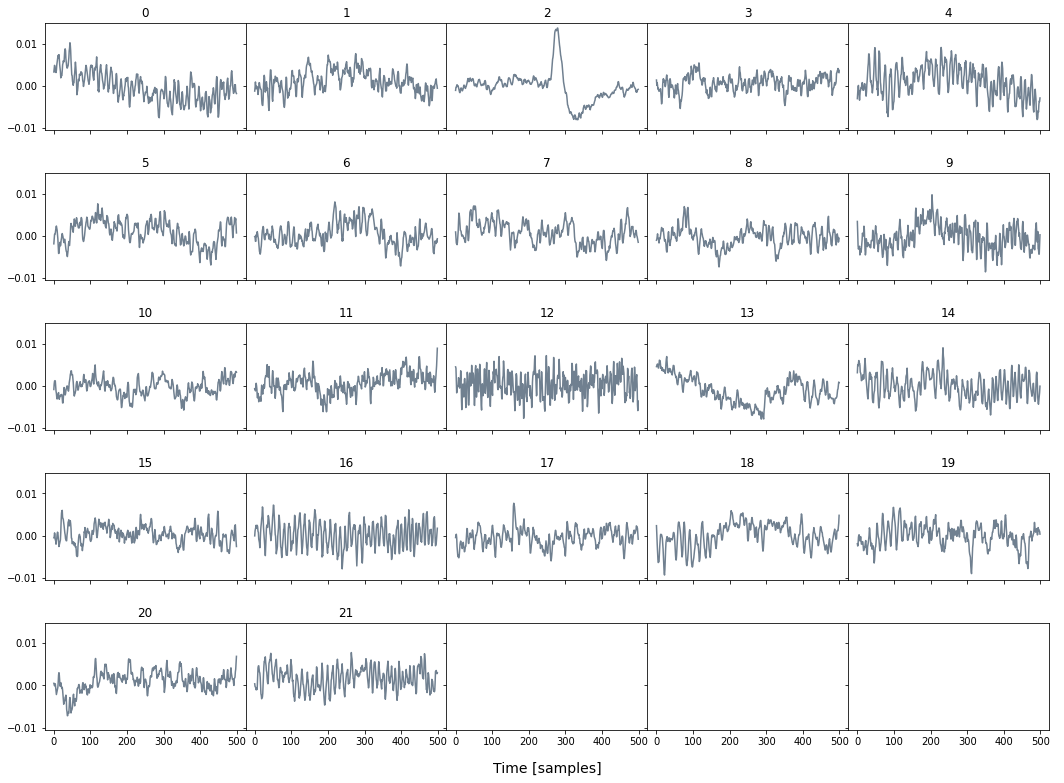

In [ ]:
fig, axs = plt.subplots(5,5, figsize=(18, 13), sharex=True, sharey=True)
fig.subplots_adjust(hspace = .4, wspace=0)
axs = axs.ravel()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)

for i in range(z):
    axs[i].plot(comps[x:y, i], color='slategrey')
    axs[i].set_title(str(i))

In [ ]:
comps_restored = comps.copy()
comps_restored[:,[2,13]] = 0 # set artefact components to zero
restored = ica.inverse_transform(comps_restored)

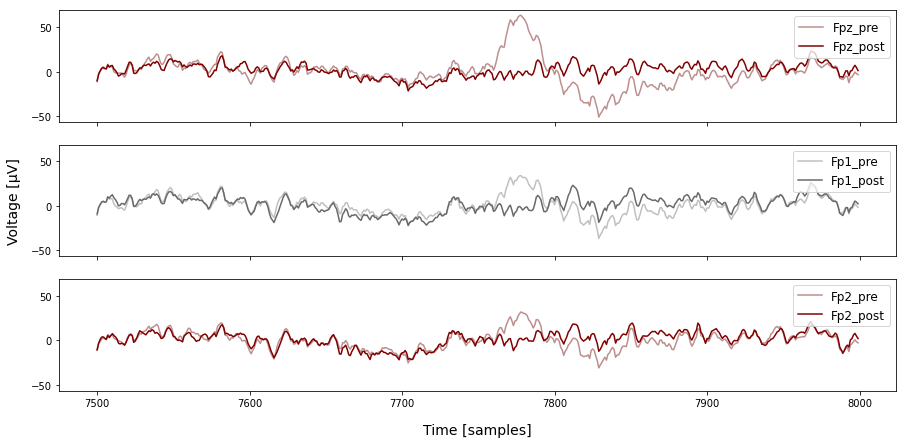

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(15, 7), sharex=True, sharey=True)
axs = axs.ravel()
plt.margins(x=0.001)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
axs[0].plot(eeg['1'].iloc[x:y], label='Fpz_pre', color='rosybrown')
axs[0].plot(np.arange(x,y), restored[x:y, 1], label='Fpz_post', color='maroon')
axs[0].legend(loc="upper right", fontsize=12)
axs[1].plot(eeg['3'].iloc[x:y], label='Fp1_pre', color='silver')
axs[1].plot(np.arange(x,y), restored[x:y, 3], label='Fp1_post', color='dimgray')
axs[1].legend(loc="upper right", fontsize=12)
axs[2].plot(eeg['5'].iloc[x:y], label='Fp2_pre', color='rosybrown')
axs[2].plot(np.arange(x,y), restored[x:y, 5], label='Fp2_post', color='maroon')
axs[2].legend(loc="upper right", fontsize=12)
plt.xlabel('Time [samples]', fontsize=14, labelpad=15)
plt.ylabel('Voltage [\u03BCV]', fontsize=14, labelpad=15) 
#plt.savefig('post_ica.png')
plt.show()

In [ ]:
#previous error corrected, file saved successfully
pd.DataFrame(restored).to_csv("/content/drive/MyDrive/BTP_AMRITAMAM/Filters/artifact_removed/A0%d/%s/artifact_removedA0%d%c_%d.csv"%(a,d,a,b,c), index=None)
print("successfully saved")

NameError: ignored